In [1]:
import math
import random
import urllib2
from nltk import word_tokenize
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def heaps_func(token_size, K, beta):
        return K * token_size ** beta

class Solve:
    def __init__(self, DATA_URL):
        self.data = urllib2.urlopen(DATA_URL).read().decode('utf-8') 
        
    def clean_data(self):
        start_text = "THE ADVENTURES OF TOM SAWYER"
        end_text = "*** END OF THIS PROJECT GUTENBERG EBOOK TOM SAWYER ***"
        
        self.data = self.data[self.data.index(start_text):self.data.index(end_text)]
        
    def get_tokens(self):
        tokens = word_tokenize(self.data)
        return tokens
    
    def get_types(self):
        tokens = self.get_tokens()
        return list(set(tokens))
            
    def get_TTR(self):
        num_types = len(self.get_types())
        num_tokens = len(self.get_tokens())
        return float(num_types)/float(num_tokens)
    
    def create_freq_dict(self):
        self.freq_dict = {}
        tokens = self.get_tokens()
        for word in tokens:
            if(word not in self.freq_dict):
                self.freq_dict[word] = 0
            self.freq_dict[word] += 1
    
    def plot_zipf_length(self):
        y = []
        for word in self.freq_dict:
            y.append(len(word) * self.freq_dict[word])
        plt.plot(range(len(self.freq_dict)), y, '.')
        plt.xlabel("Word index")
        plt.ylabel("Word length x Word frequency")
        plt.show()
        
    def plot_zipf_meaning(self, DICTIONARY_PATH):
        all_words = open(DICTIONARY_PATH).read().decode('utf-8').split()
        y = []
        random_keys = random.sample(self.freq_dict.keys(), 100)
        for word in random_keys:
            y.append(all_words.count(word.upper())/math.sqrt(self.freq_dict[word]))
        plt.plot(range(100), y, '.')
        plt.xlabel("Word index")
        plt.ylabel("Word meanings / sqrt(Word frequency)")
        plt.show()
        
    def plot_heaps(self):
        vocabulary = set([])
        tokens = self.get_tokens()
        y = []
        for word in tokens:
            vocabulary.add(word)
            y.append(len(vocabulary))
            
        opt_vals, opt_curve = curve_fit(heaps_func, range(len(tokens)), y)
        print "\nCurve fitting parameters: "
        print "K: " + str(opt_vals[0]) + "\nBeta: " + str(opt_vals[1]) 
            
        plt.plot(range(len(tokens)), y, 'y.')
        plt.plot(range(len(tokens)), heaps_func(range(len(tokens)), opt_vals[0], opt_vals[1]), 'r--')
        plt.xlabel("Words in collection")
        plt.ylabel("Words in vocabulary")
        plt.show()
    
solve = Solve("http://www.gutenberg.org/files/74/74-0.txt")
solve.clean_data()
solve.create_freq_dict()

In [13]:
print "Tokens: " + str(len(solve.get_tokens()))

Tokens: 87888


In [15]:
print "Types: " + str(len(solve.get_types()))

Types: 8771


In [16]:
print "TTR: " + str(solve.get_TTR())

TTR: 0.0997974695066


Zipf's plot for length: 


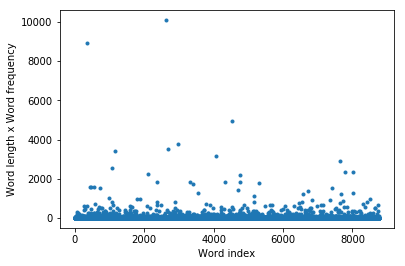

In [17]:
print "Zipf's plot for length: "
solve.plot_zipf_length()

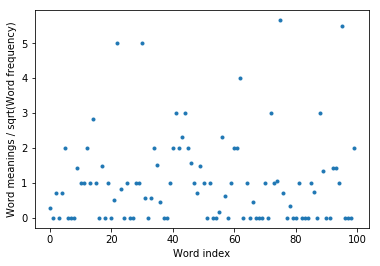

In [3]:
solve.plot_zipf_meaning("dictionary.txt")

Heaps' plot: 

Curve fitting parameters: 
K: 13.005099911310241
Beta: 0.5740879381857268


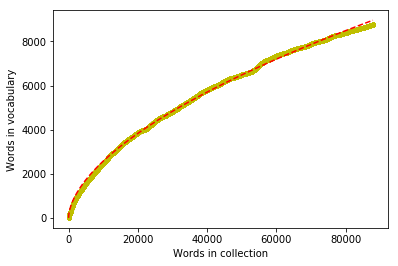

In [7]:
print "Heaps' plot: "
solve.plot_heaps()